# Прогнозирование удоя коров

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

1. Первая будет прогнозировать возможный удой коровы (целевой признак `Удой`);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).

С помощью модели нужно отобрать коров по двум критериям:

- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

# Описание данных

Вы будете работать с тремя датасетами:

[ferma_main.csv](https://code.s3.yandex.net/datasets/ferma_main.csv)

[ferma_dad.csv](https://code.s3.yandex.net/datasets/ferma_dad.csv)

[cow_buy.csv](https://code.s3.yandex.net/datasets/cow_buy.csv)

Вы можете их скачать, нажав на название каждого.

1. Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Описание данных:
    - `id` — уникальный идентификатор коровы.
    - `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
    - `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
    - `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
    - `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
    - `Порода` — порода коровы.
    - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    - `порода папы_быка` — порода папы коровы.
    - `Жирность,%` — содержание жиров в молоке (в процентах).
    - `Белок,%` — содержание белков в молоке (в процентах).
    - `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (`вкусно`, `не вкусно`).
    - `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).
    
    Признаки в датасете `ferma_main.csv` можно разделить на группы.
    
    - Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`.
    - Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.
    - Характеристика пастбища: `Тип пастбища`.
    - Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.
    
    Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.
    
2. Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:
    - `id` — уникальный идентификатор коровы.
    - `Имя Папы` — имя папы коровы.
3. Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
    - `Порода` — порода коровы.
    - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    - `порода папы_быка` — порода папы коровы.
    - `Имя_папы` — имя папы коровы.
    - `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
    - `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
    - `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).
    
    Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей.
    
    - Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
    - Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
    - Кроме того, отсутствуют признаки `Удой, кг` и `Вкус молока`. Это целевые признаки, именно их предстоит предсказать!

# План работы

### Шаг 1. Загрузите и изучите данные

1. Загрузите данные в датафреймы `pandas`. Файлы можно сказать по ссылкам в описании, они даже доступны через пути:
    - `/datasets/ferma_main.csv`
    - `/datasets/ferma_dad.csv`
    - `/datasets/cow_buy.csv`
2. Изучите данные. Определите, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименуйте столбцы.

### Шаг 2. Предобработка данных

Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

### Шаг 3. Исследовательский анализ данных

1. Проведите статистический анализ всех признаков.
2. Постройте графики для каждого признака. Помните, что количественным и категориальным признакам подходят разные графики.
3. Сделайте выводы о данных: -
    - напишите, заметили ли вы выбросы, необычное распределение количественных признаков или другие особенности;
    - расскажите, как вы планируете улучшить данные.

### Шаг 4. Проведите корреляционный анализ признаков в датасете `ferma_main.csv`

1. Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.
2. Постройте диаграммы рассеяния `scatterplot` для признака `Удой, кг` и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для `Удой, кг` и `Сырой протеин, г`, цвет точек диаграммы отображает признак `Порода`. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.
3. Сделайте выводы о взаимосвязи признаков.
    - Какой тип взаимосвязи между целевым и входными признаками?
    - Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
    - Наблюдается ли мультиколлинеарность между входными признаками?

### Шаг 5. Задача регрессии

Вам предстоит обучить три модели простой линейной регрессии.

1. Подготовьте данные датасета `ferma_main.csv` и обучите на них первую модель `LinearRegression`.
    - Используйте в качестве целевого признак `Удой, кг`.
    - Отберите признаки, которые подходят для модели линейной регрессии, аргументируйте выбор. Опирайтесь не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета.
    - Разбейте данные на тренировочную и тестовую выборки.
    - Кодируйте категориальные признаки с помощью `OneHotEncoder`.
    - Масштабируйте количественные признаки с помощью `StandardScaler`.
    - Обучите модель линейной регрессии на подготовленных данных.
    - Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.
    - Оформите выводы, укажите:
        - значение R² модели;
        - какие выводы следуют из анализа остатков;
        - нужны ли дополнительные исследования.
2. Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель `LinearRegression`.
    - Посмотрите на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:
        - Вы обнаружите, что `СПО` и `Удой` связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение `СПО`, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте `СПО` в категориальный бинарный признак, использовав эту границу.
        - Вы обнаружите, что `ЭКЕ` и `Удой` также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак `ЭКЕ в квадрате`.
    - Повторите шаги из пункта 1 и создайте вторую модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.
3. Добавьте в данные новый признак и обучите на них третью модель `LinearRegression`.
    - Добавьте признак `Имя Папы` из файла `ferma_dad.csv`, соединив его с остальными данными `ferma_main.csv` по ключу.
    - Устраните нелинейность между признаками.
    - Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.
4. Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.
5. Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик. Укажите:
    - лучшую модель;
    - доверительный интервал прогноза лучшей модели.
6. С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете `cow_buy.csv`.
    - Добавьте недостающие признаки `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)`: возьмите из датасета `ferma_main.csv` средние значения каждого из признаков и увеличьте их на 5%.
    - Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
    - Получите прогноз удоя коров.

### Шаг 6. Задача классификации

1. Подготовьте данные датасета `ferma_main.csv` и обучите на них модель `LogisticRegression`.
    - Используйте в качестве целевого признак `Вкус молока`.
    - При необходимости преобразуйте имеющиеся или добавьте новые признаки.
    - Разбейте данные на тренировочную и тестовую выборки.
    - Кодируйте категориальные признаки с помощью `OneHotEncoder`.
    - Масштабируйте количественные признаки с помощью `StandardScaler`.
    - Обучите модель логистической регрессии на подготовленных данных.
    - Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
    - Постройте матрицу ошибок.
2. Проанализируйте модель логистической регрессии.
    - Объясните, какая ошибка критичнее всего при покупке коров: первого или второго рода. Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них.
    - Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?
    - Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?
3. С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете `cow_buy.csv`.
    - Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
    - Получите прогноз вкуса молока коров.

### Шаг 7. Сделайте итоговые выводы

- Добавьте прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.
- Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.
- Коротко опишите результаты работы моделей для фермера.
    - Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?
    - Какие ещё рекомендации можно ему дать?
- Сделайте выводы о моделях линейной регрессии и логистической регрессии.
    - Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?
    - Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?
    - Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

## Загрузка данных

In [1]:
!pip install phik -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.3 MB/s eta 0:00:00


In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (r2_score,
                             confusion_matrix,
                             accuracy_score,
                             mean_squared_error,
                             mean_absolute_error,
                             recall_score,
                             precision_score)

import phik

Загрузим данные

In [3]:
df_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal=',')
df_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';')
df_cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';', decimal=',')

In [4]:
df_main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [6]:
df_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [8]:
df_cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [9]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Данных не совсем много, 20 строк в `df_cow_buy`, 634 строк в `df_main`, 629 строк в `df_dad`

##  Предобработка данных

### Обработка названий столбцов

Столбцы в датафреймах написаны на русском в различных регистрах. Обработаем их.

In [10]:
df_main.columns = [x.lower() for x in df_main.columns]
df_dad.columns = [x.lower() for x in df_dad.columns]
df_cow_buy.columns = [x.lower() for x in df_cow_buy.columns]

In [11]:
df_main = df_main.rename(columns={
    'тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы_быка',
    'эке (энергетическая кормовая единица)': 'энергетическая_кормовая_единица',
    'спо (сахаро-протеиновое соотношение)': 'сахаро_протеиновое_соотношение',
    'вкус молока': 'вкус_молока',
    'удой, кг': 'удой_кг',
    'сырой протеин, г': 'сырой_протеин_г',
    'жирность,%': 'жирность',
    'белок,%': 'белок'})

df_dad = df_dad.rename(columns={'имя папы': 'имя_папы'})

df_cow_buy = df_cow_buy.rename(columns={'тип пастбища': 'тип_пастбища',
                                        'порода папы_быка': 'порода_папы_быка',
                                        'текущая_жирность,%': 'жирность',
                                        'текущий_уровень_белок,%': 'белок'})

### Обработка пропусков

Проверим количество пропусков

In [12]:
df_main.isna().sum()

id                                 0
удой_кг                            0
энергетическая_кормовая_единица    0
сырой_протеин_г                    0
сахаро_протеиновое_соотношение     0
порода                             0
тип_пастбища                       0
порода_папы_быка                   0
жирность                           0
белок                              0
вкус_молока                        0
возраст                            0
dtype: int64

In [13]:
df_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [14]:
df_cow_buy.isna().sum()

порода              0
тип_пастбища        0
порода_папы_быка    0
имя_папы            0
жирность            0
белок               0
возраст             0
dtype: int64

Пропусков в данных нет. Посмотрим на дубликаты

### Обработка дубликатов

In [15]:
print('Количество дубликатов:',
      df_main.duplicated().sum())

Количество дубликатов: 5


In [16]:
print('Количество дубликатов:',
      df_dad.duplicated().sum())

Количество дубликатов: 0


In [17]:
print('Количество дубликатов:',
      df_cow_buy.duplicated().sum())

Количество дубликатов: 4


Удалим их

In [18]:
df_main = df_main.drop_duplicates()


В cow_buy не будем удалять дубликаты, так как данных - всего 20 строк.

Возможно, в данных присутствуют неявные дубликаты. Выведем уникальные значения в категориальных признаках:

In [19]:
for i in ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']:
    print(f'Уникальные значения в столбце {i}:', df_main[i].unique())

Уникальные значения в столбце порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце тип_пастбища: ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения в столбце порода_папы_быка: ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения в столбце вкус_молока: ['вкусно' 'не вкусно']
Уникальные значения в столбце возраст: ['более_2_лет' 'менее_2_лет']


In [20]:
for i in ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']:
    print(f'Уникальные значения в столбце {i}:', df_cow_buy[i].unique())

Уникальные значения в столбце порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце тип_пастбища: ['холмистое' 'равнинное']
Уникальные значения в столбце порода_папы_быка: ['Айдиал' 'Соверин']
Уникальные значения в столбце возраст: ['более_2_лет' 'менее_2_лет']
Уникальные значения в столбце имя_папы: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']


In [21]:
for i in ['имя_папы']:
    print(f'Уникальные значения в столбце {i}:', df_dad[i].unique())

Уникальные значения в столбце имя_папы: ['Буйный' 'Соловчик' 'Барин' 'Геркулес']


Как видно: "Равнинное-Равнинные", "Айдиал-Айдиалл"

In [22]:
df_main = (
    df_main
    .replace(['Айдиалл'], 'Айдиал', regex=True)
    .replace(['Равнинные', 'Равнинное'], 'равнинное', regex=True)
    .replace('Х', 'х', regex=True)
)

Преобразования типов данных не требуется.

## Исследовательский анализ данных

In [23]:
def cat_plot(dataframe, array):
    for i in array:
        df = dataframe[i].value_counts()
        plt.figure(figsize=(10, 8))
        df.plot(kind='bar')
        plt.show()


In [24]:
df_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
удой_кг,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
энергетическая_кормовая_единица,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
сырой_протеин_г,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
сахаро_протеиновое_соотношение,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
жирность,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
белок,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


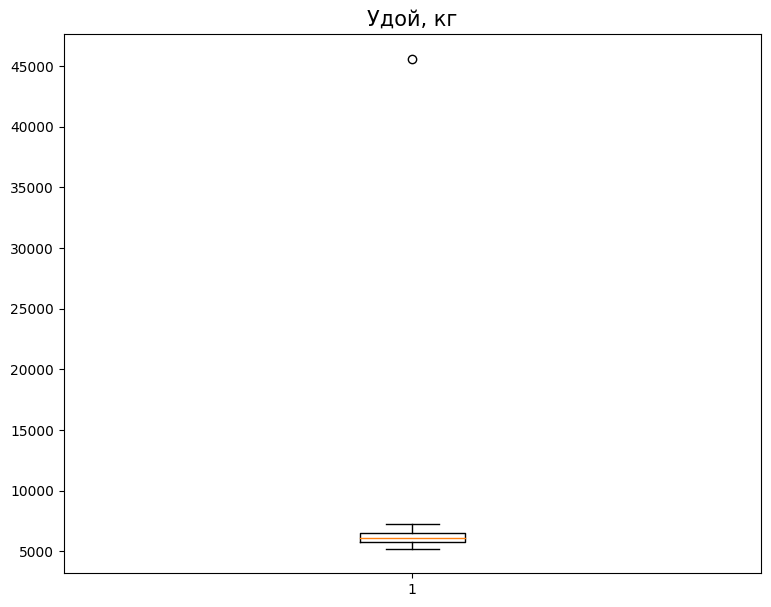

In [25]:
plt.figure(figsize=(9, 7))
plt.boxplot(df_main['удой_кг'])
plt.title('Удой, кг', fontsize=15);

Как мы видим, у `удой,кг` есть выброс в районе 45000-46000 кг. Стоит его удалить, т.к. он может сильно повлиять на результаты.

In [26]:
df_main = df_main.query('удой_кг < 10000')

In [27]:
df_cow_buy.describe()

,жирность,белок
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


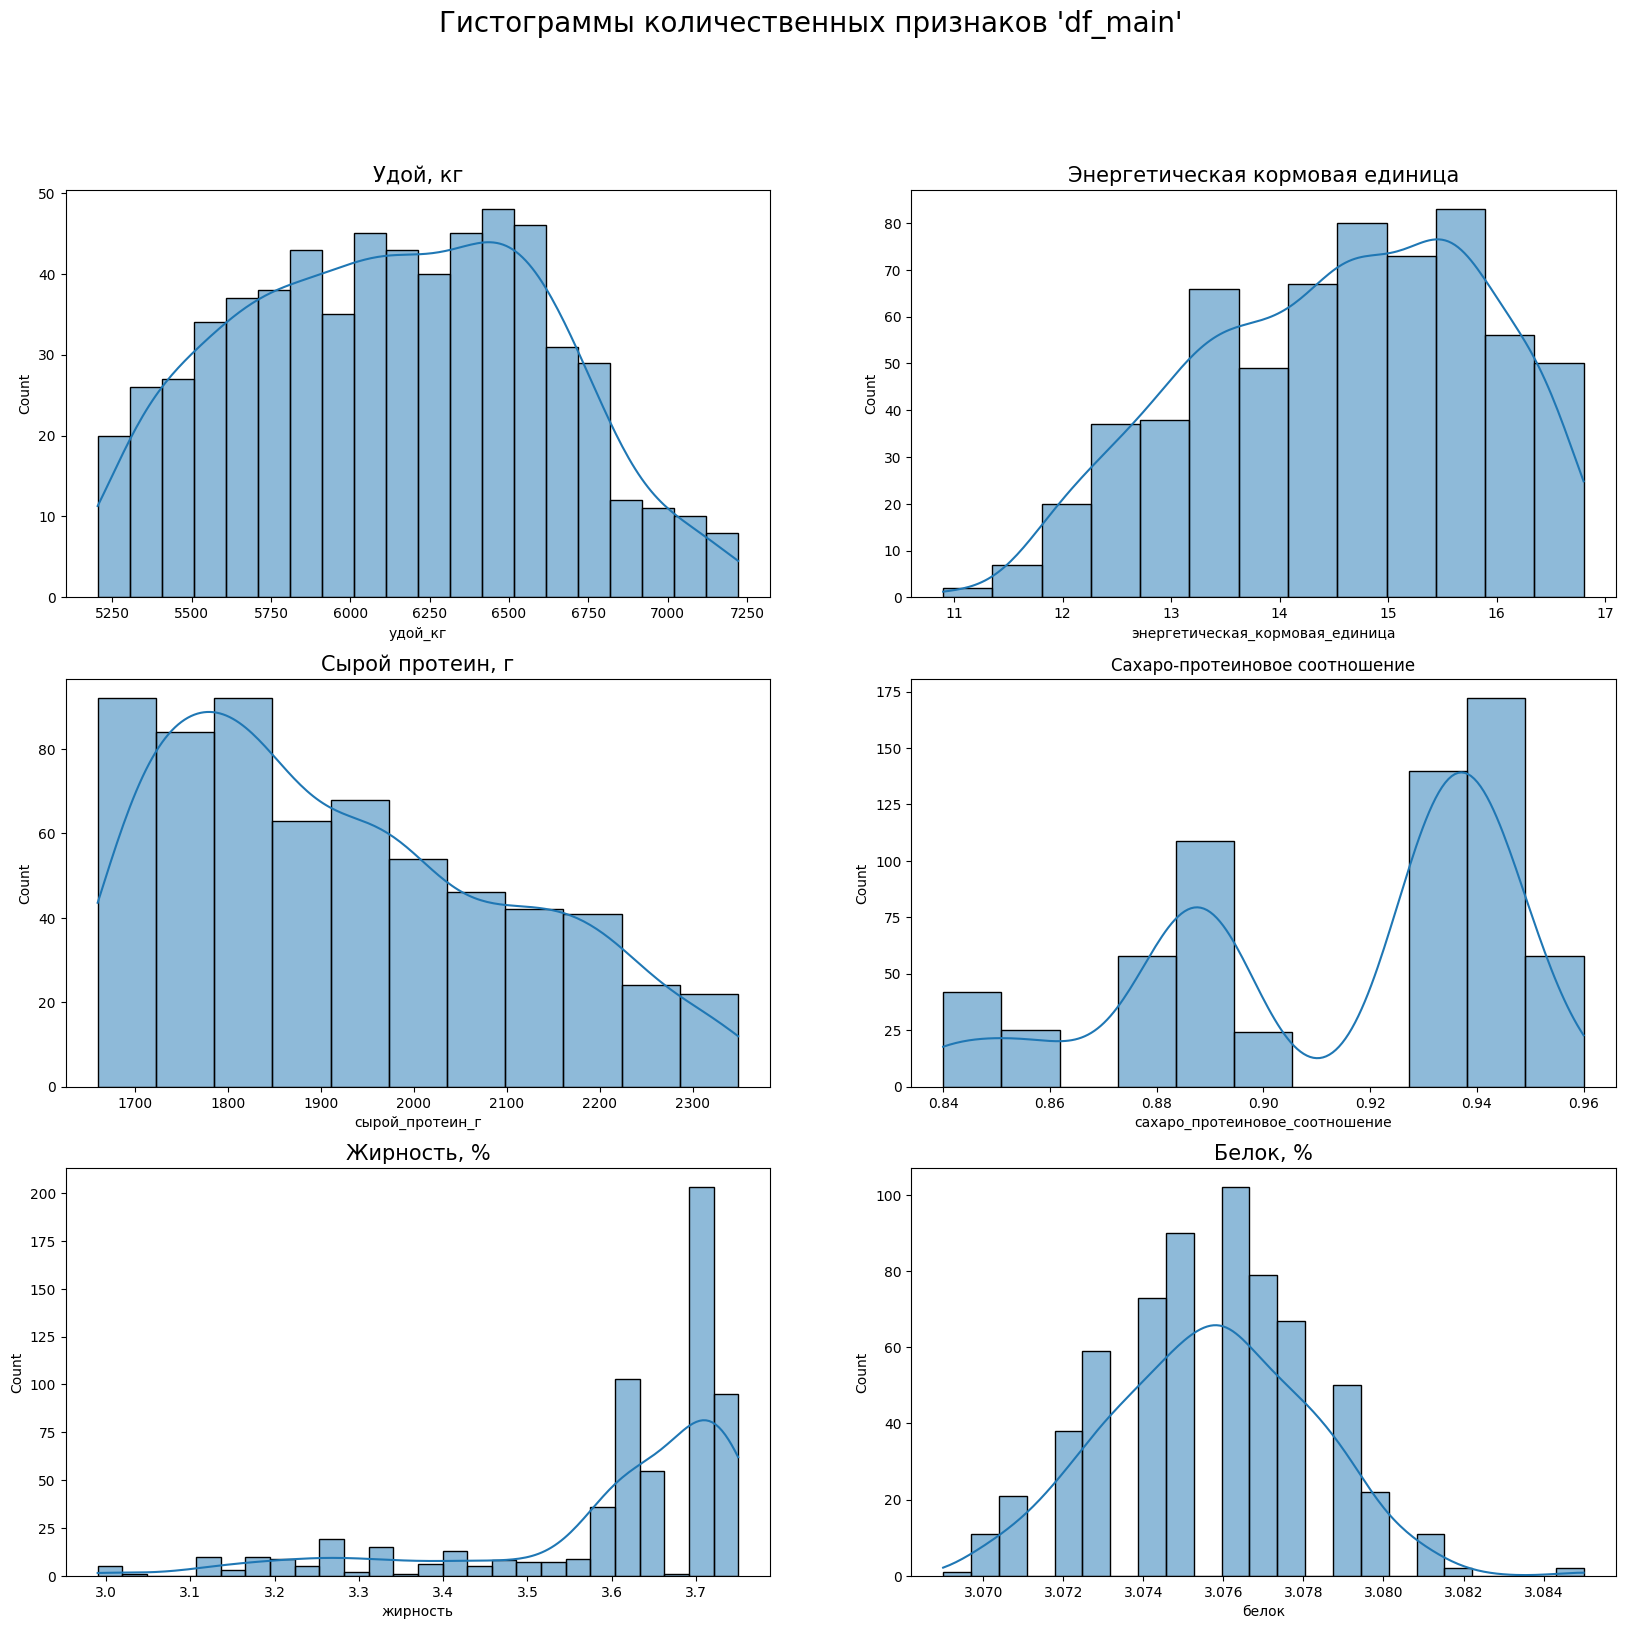

In [28]:
fig, axs = plt.subplots(3, 2, figsize=(20, 18))
plt.suptitle('Гистограммы количественных признаков \'df_main\' ', fontsize=20)

axs[0][0].set_title('Удой, кг', fontsize=15)
sns.histplot(data=df_main['удой_кг'], ax=axs[0][0], kde=True, bins=20)

axs[0][1].set_title('Энергетическая кормовая единица', fontsize=15)
sns.histplot(data=df_main['энергетическая_кормовая_единица'], ax=axs[0][1], kde=True)

axs[1][0].set_title('Сырой протеин, г', fontsize=15)
sns.histplot(data=df_main['сырой_протеин_г'], ax=axs[1][0], kde=True)

axs[1][1].set_title('Cахаро-протеиновое соотношение', fontsize=12)
sns.histplot(data=df_main['сахаро_протеиновое_соотношение'], ax=axs[1][1], kde=True)

axs[2][0].set_title('Жирность, %', fontsize=15)
sns.histplot(data=df_main['жирность'], ax=axs[2][0], kde=True)

axs[2][1].set_title('Белок, %', fontsize=15)
sns.histplot(data=df_main['белок'], ax=axs[2][1], kde=True);

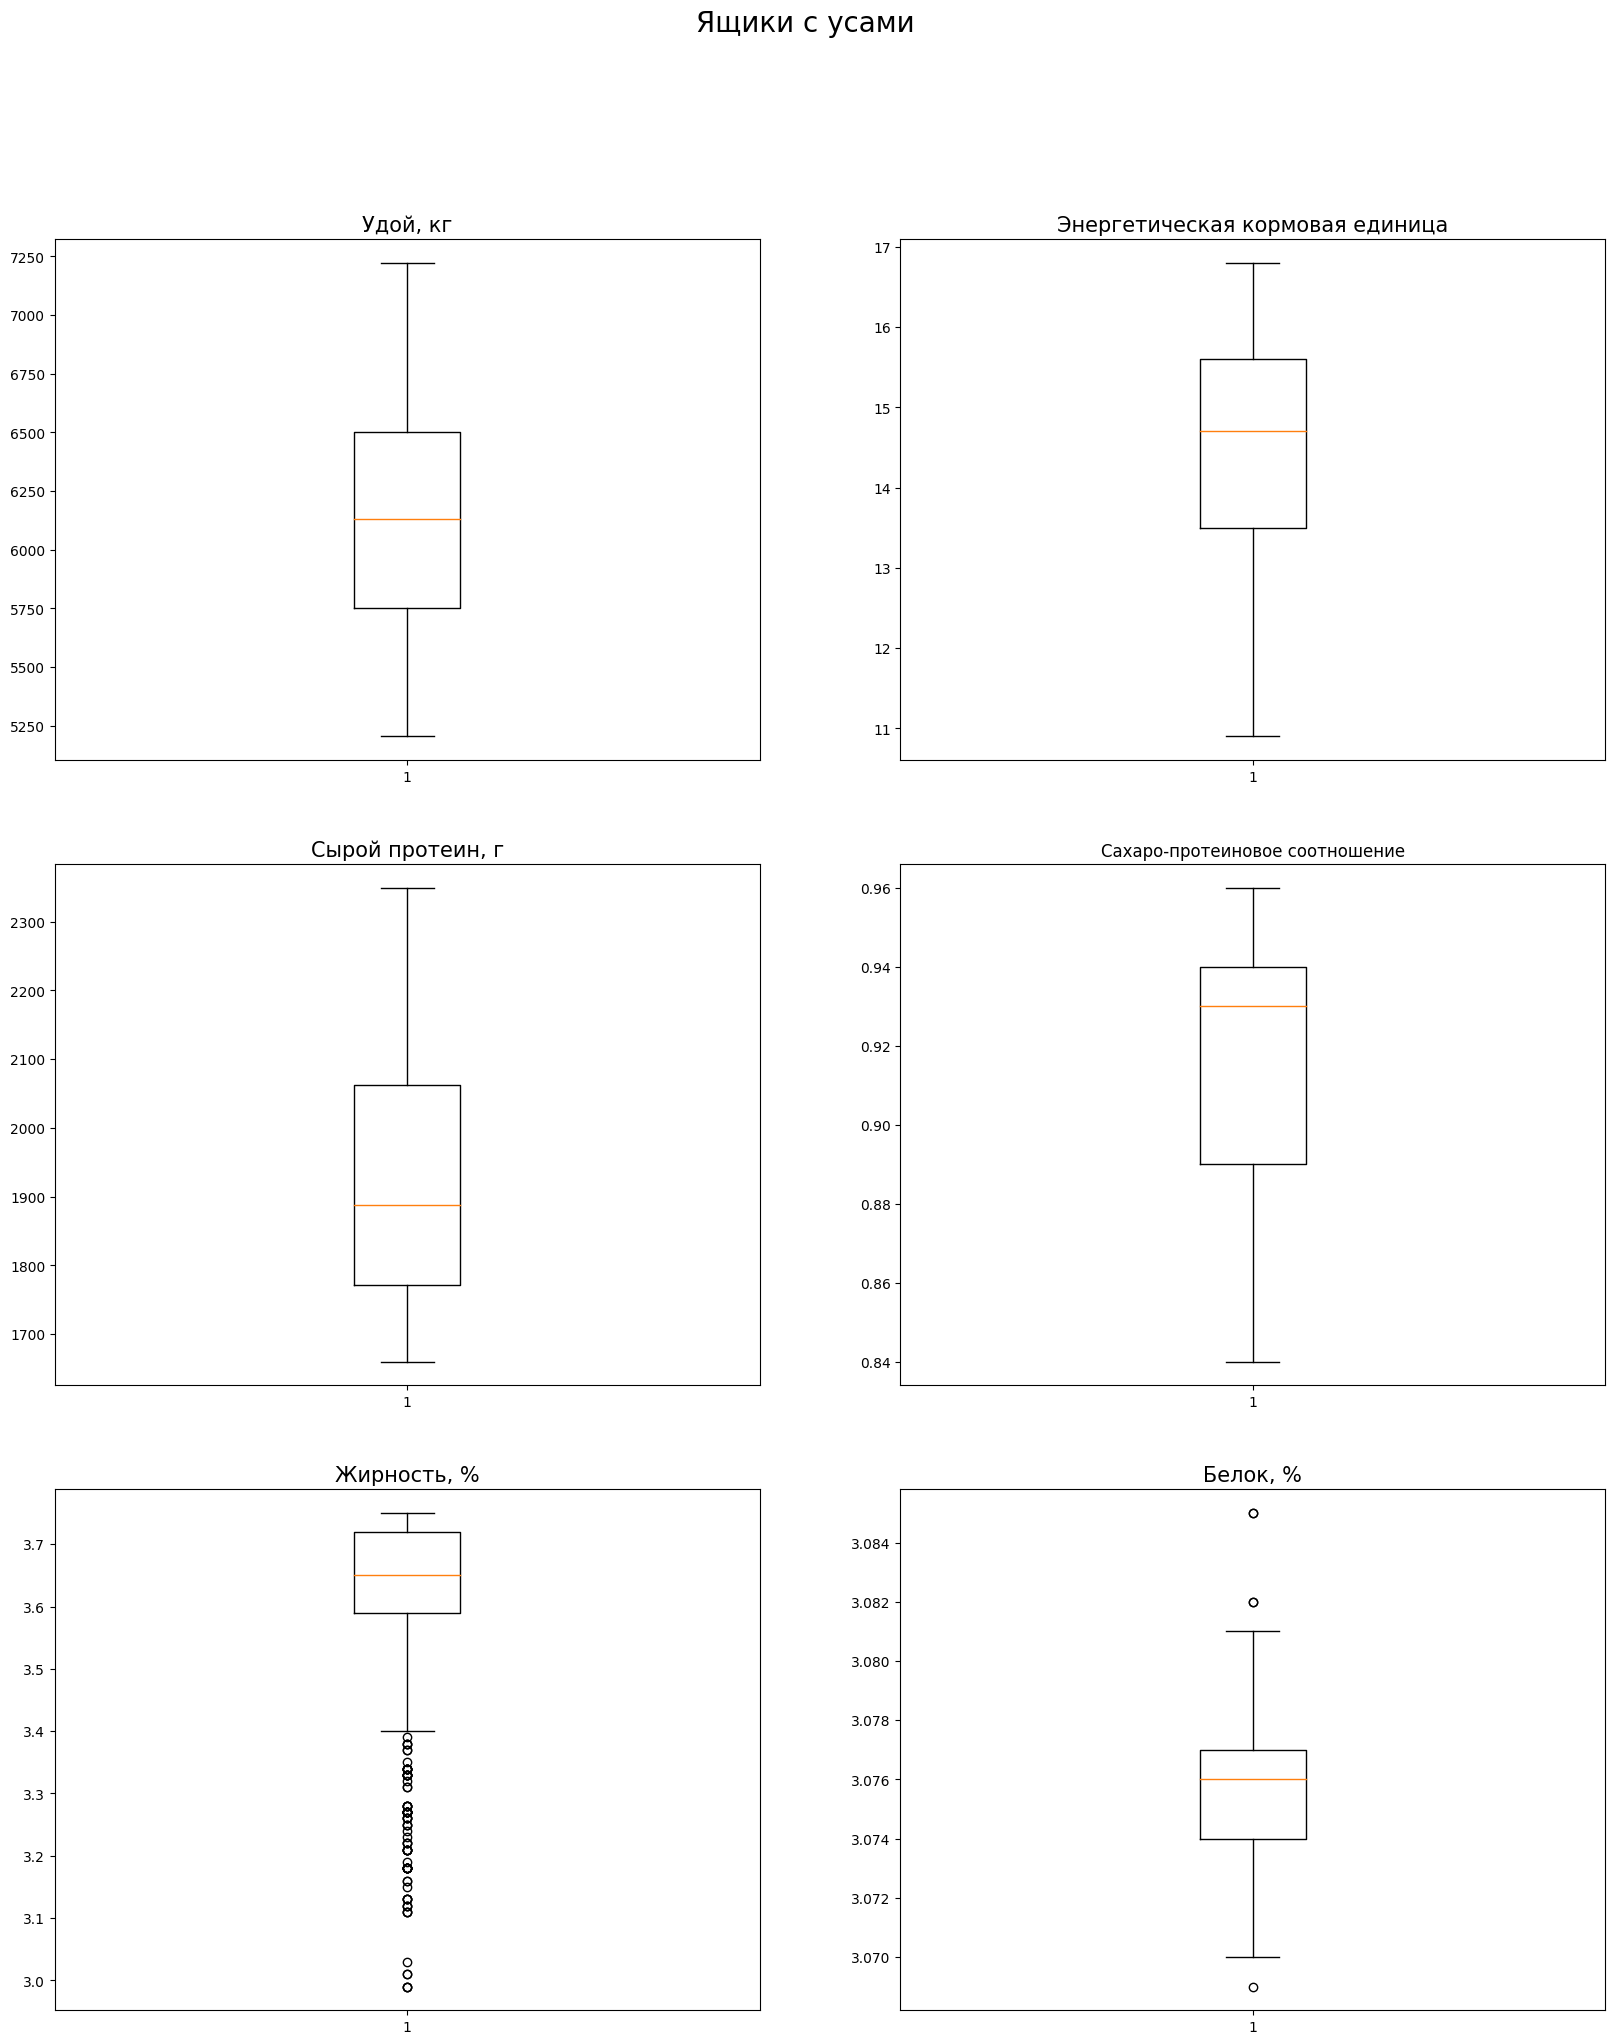

In [29]:
fig, axs = plt.subplots(3, 2, figsize=(20, 23))
plt.suptitle('Ящики с усами', fontsize=20)

axs[0][0].boxplot(df_main['удой_кг'])
axs[0][0].set_title('Удой, кг', fontsize=15)

axs[0][1].boxplot(df_main['энергетическая_кормовая_единица'])
axs[0][1].set_title('Энергетическая кормовая единица', fontsize=15)

axs[1][0].boxplot(df_main['сырой_протеин_г'])
axs[1][0].set_title('Сырой протеин, г', fontsize=15)

axs[1][1].boxplot(df_main['сахаро_протеиновое_соотношение'])
axs[1][1].set_title('Cахаро-протеиновое соотношение', fontsize=12)

axs[2][0].boxplot(df_main['жирность'])
axs[2][0].set_title('Жирность, %', fontsize=15)

axs[2][1].boxplot(df_main['белок']);
axs[2][1].set_title('Белок, %', fontsize=15);

В данных присутствуют выбросы. Судя по графикам, ближе к нормальному распределены удой и белок.

In [30]:
((df_main['жирность'].count() - df_main.query('жирность > 3.1')['жирность'].count()) / df_main['жирность'].count()) * 100

0.9554140127388535

Удалив 3 выброса, потеряем меньше процента от всех данных

Полностью выбросы удалять не будем, только 3 выбивающиеся

In [31]:
df_main = df_main.query('жирность > 3.1')

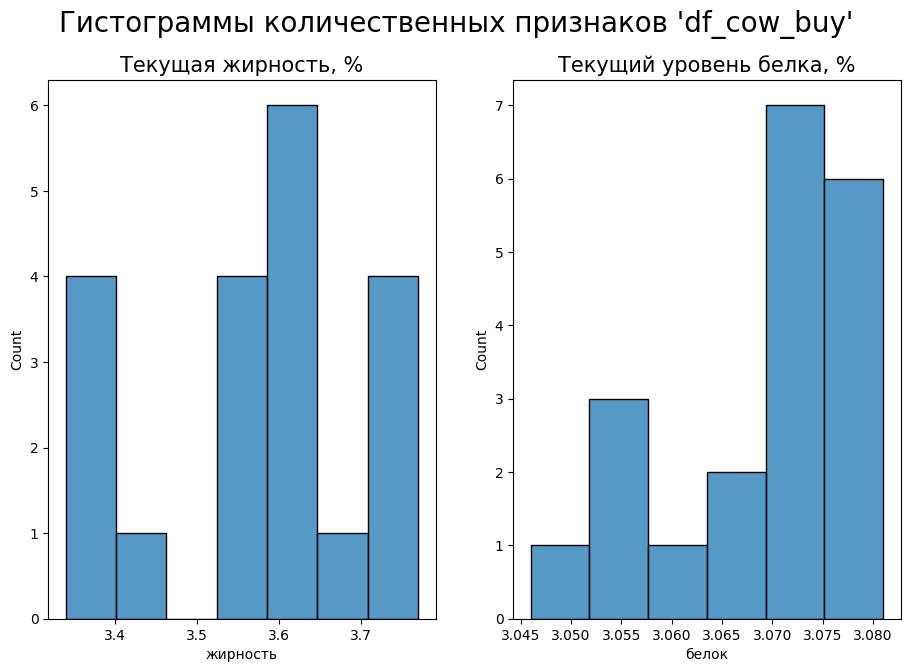

In [32]:
fig2, axs2 = plt.subplots(1, 2, figsize=(11, 7))
plt.suptitle('Гистограммы количественных признаков \'df_cow_buy\' ', fontsize=20)

axs2[0].set_title('Текущая жирность, %', fontsize=15)
sns.histplot(data=df_cow_buy['жирность'], ax=axs2[0], bins=7)

axs2[1].set_title('Текущий уровень белка, %', fontsize=15)
sns.histplot(data=df_cow_buy['белок'], ax=axs2[1]);

Мало какие признаки имеют распределение, похожее на нормальное. У сахаро-протеинового соотношения и белка имеются разрывы. Выбросов не много.

**Графики категориальных признаков**

`df_main`

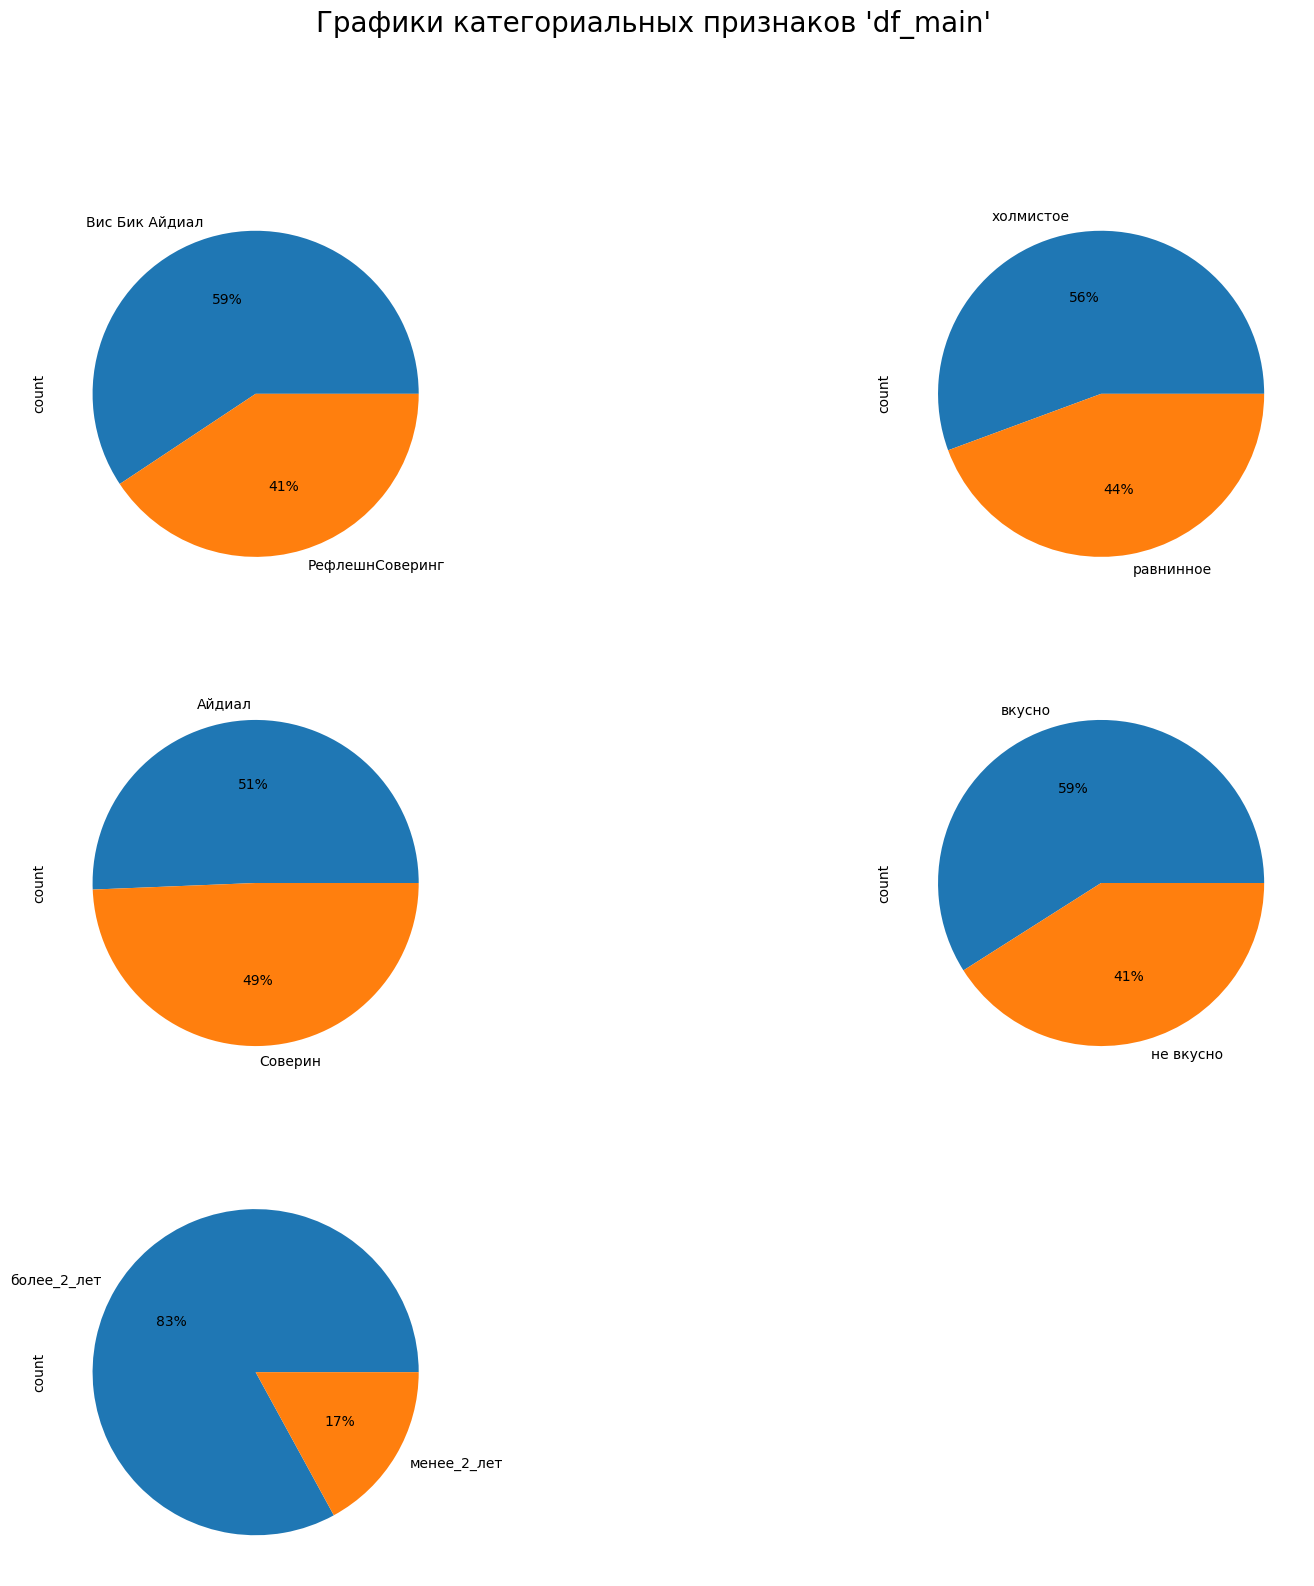

In [33]:
plt.figure(figsize=(20, 18))
plt.suptitle('Графики категориальных признаков \'df_main\'', fontsize=20)

plt.subplot(3, 2, 1)
df_main['порода'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(3, 2, 2)
df_main['тип_пастбища'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(3, 2, 3)
df_main['порода_папы_быка'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(3, 2, 4)
df_main['вкус_молока'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(3, 2, 5)
df_main['возраст'].value_counts().plot(kind='pie', autopct='%1.0f%%');

`df_dad`

Видно, что большиство молочных коров старше двух лет. Что касается других характеристик, они отличаются не больше чем на 10 %

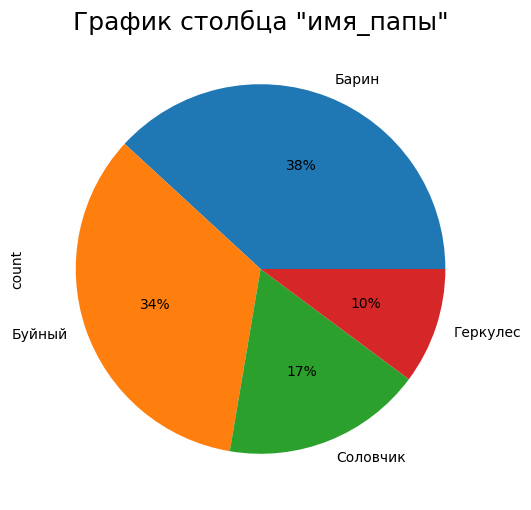

In [34]:
plt.title('График столбца "имя_папы"', fontsize=18)
df_dad['имя_папы'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.0f%%');

Большиство потомства дали Буйный и Барин - 72 % в общем

`df_cow_buy`

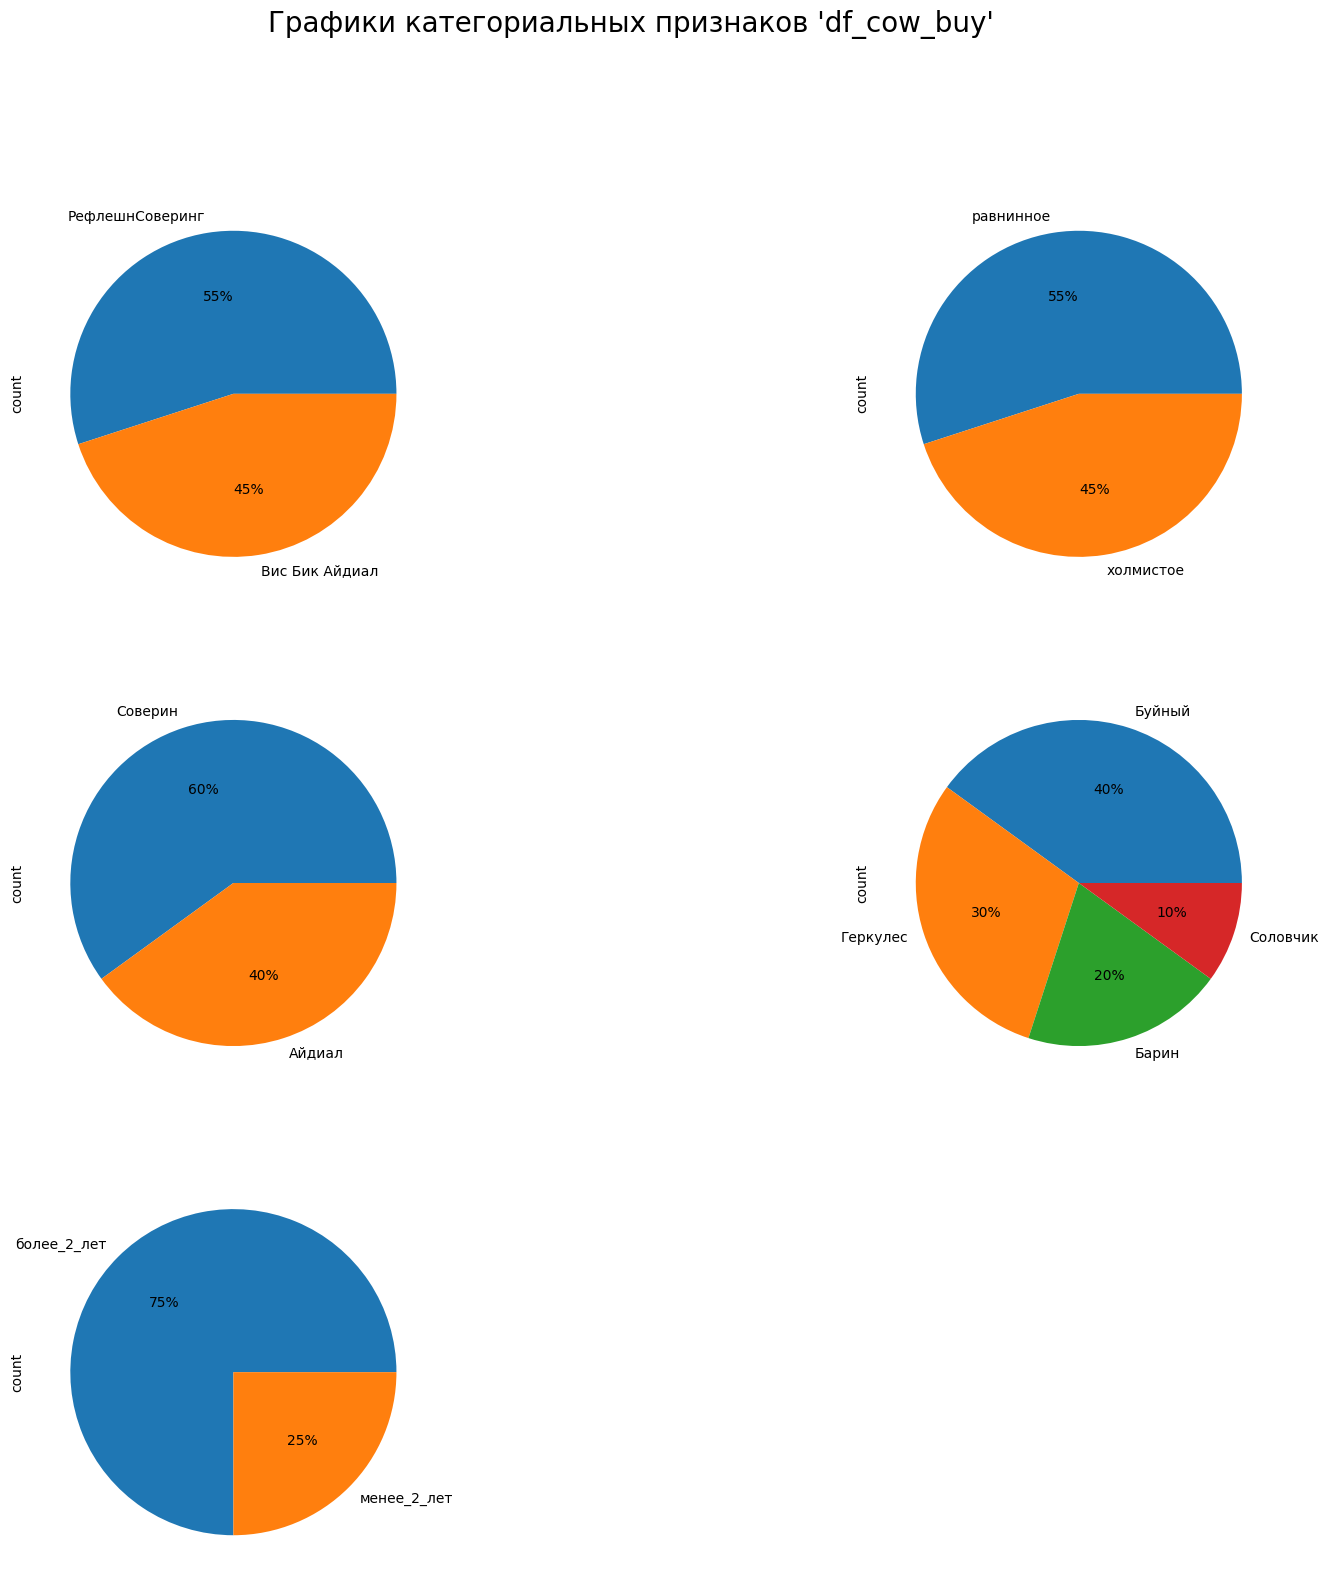

In [35]:
plt.figure(figsize=(20, 18))
plt.suptitle('Графики категориальных признаков \'df_cow_buy\'', fontsize=20)

plt.subplot(3, 2, 1)
df_cow_buy['порода'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(3, 2, 2)
df_cow_buy['тип_пастбища'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(3, 2, 3)
df_cow_buy['порода_папы_быка'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(3, 2, 4)
df_cow_buy['имя_папы'].value_counts().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(3, 2, 5)
df_cow_buy['возраст'].value_counts().plot(kind='pie', autopct='%1.0f%%');


С датафреймом `df_cow_buy` почти такая же ситуация - здесь преобладает равнинная местность пастбища, в отличие от `df_main`. Большинство потомства дали Буйный и Геркулес - 70 % от общего числа.

## Корреляционный анализ

Построим матрицу корреляций и диаграммы рассеяния для всех признаков датафрейма `df_main`.

interval columns not set, guessing: ['id', 'удой_кг', 'энергетическая_кормовая_единица', 'сырой_протеин_г', 'сахаро_протеиновое_соотношение', 'жирность', 'белок']


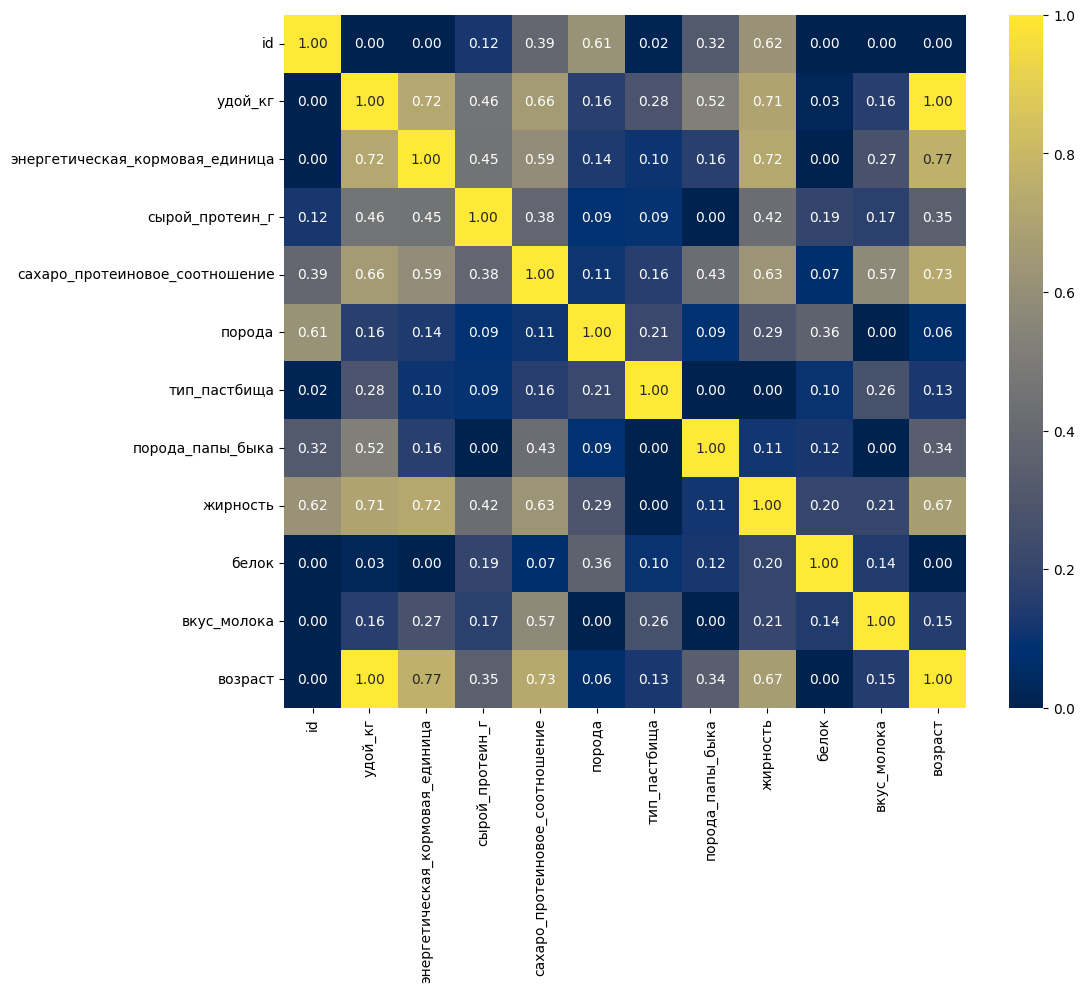

In [36]:
plt.figure(figsize=(11, 9))
sns.heatmap(df_main.phik_matrix(), annot=True, cmap='cividis', fmt='.2f');

Как видим, с удоем в большей степени коррелирует ЭКЕ, СПО и сырой протеин. Удой вряд ли можно связать с жирностью и белком, потому как их измеряют уже после удоя.
Со вкусом молока коррелирует СПО.

In [37]:
def pair_plot(df, feature):
    num_features = df.drop(['id', feature] ,axis = 1).select_dtypes(exclude=[object]).columns
    cat_features = df.select_dtypes(include=[object]).columns

    for i in range(len(cat_features)):
        sns.pairplot(
            df,
            hue = cat_features[i],
            x_vars=num_features ,
            y_vars=df_main[feature].name)

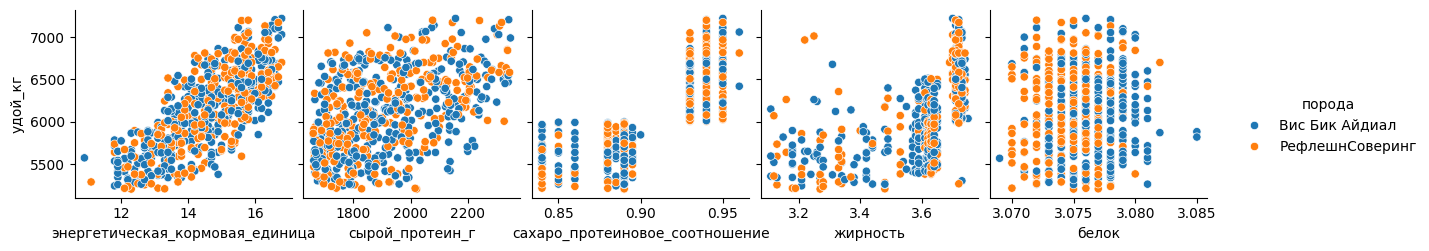

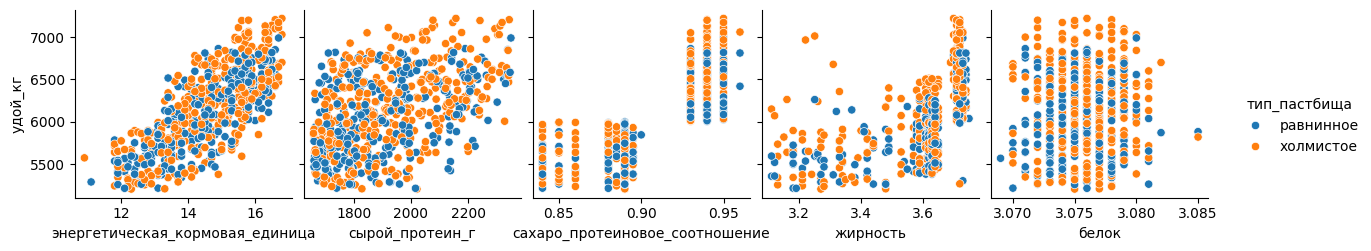

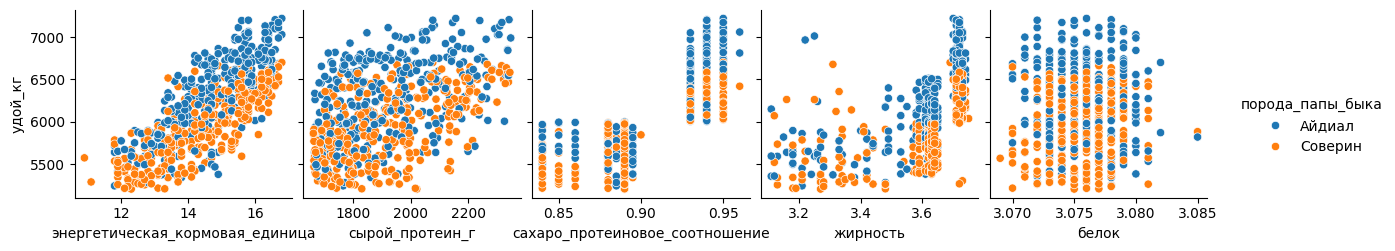

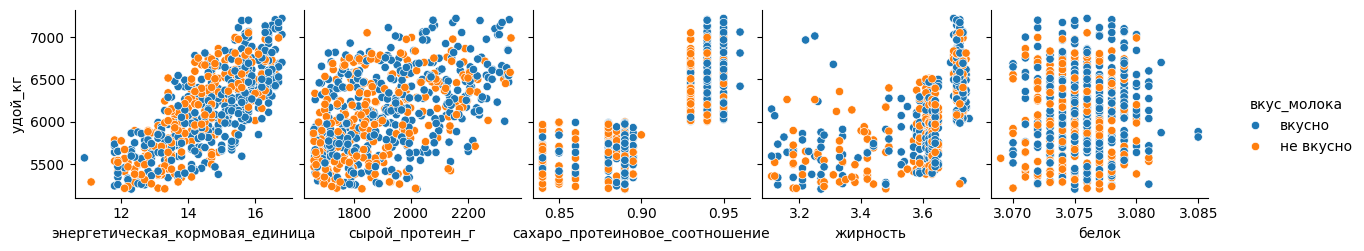

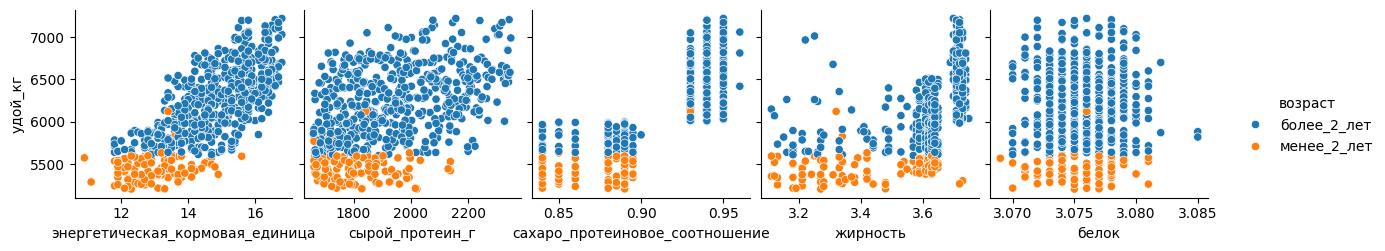

In [38]:
pair_plot(df_main, 'удой_кг')

Можно заметить, что удой в большей степени зависит от ЭКЕ и сырого протеина. СПО, судя по графику, имеет дискретные значения, как и белок.

Мультиколлинеарность (корреляция от 0.9 до 0.95) не наблюдается.

In [39]:
df_main.query('удой_кг > 6000').head(20)

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
7,8,6179,14.7,1806,0.93,Вис Бик Айдиал,равнинное,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.94,РефлешнСоверинг,холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
11,12,6563,16.5,2328,0.93,Вис Бик Айдиал,холмистое,Соверин,3.71,3.075,вкусно,более_2_лет
12,13,6173,15.4,2193,0.93,РефлешнСоверинг,холмистое,Соверин,3.72,3.075,вкусно,более_2_лет
13,14,6131,14.5,1766,0.93,РефлешнСоверинг,равнинное,Айдиал,3.61,3.076,не вкусно,более_2_лет
14,15,6014,16.0,1769,0.93,Вис Бик Айдиал,равнинное,Айдиал,3.71,3.071,не вкусно,более_2_лет
15,16,6518,15.6,1747,0.93,Вис Бик Айдиал,равнинное,Айдиал,3.73,3.076,вкусно,более_2_лет
18,19,6461,15.7,2159,0.93,РефлешнСоверинг,холмистое,Соверин,3.72,3.073,не вкусно,более_2_лет
20,21,6752,15.5,1924,0.93,РефлешнСоверинг,холмистое,Айдиал,3.73,3.078,вкусно,более_2_лет
21,22,6278,14.6,1947,0.93,РефлешнСоверинг,холмистое,Айдиал,3.49,3.071,вкусно,более_2_лет


## Обучение модели линейной регрессии

В качестве входных признаков укажем ЭКЕ, сырой протеин и СПО. Жирность и белок смысла указывать нет, так как они измеряются уже после удоя. Вкус молока также не является причиной удоя.

Создадим функцию для **линейной** модели:

In [40]:
def linear_model(X, y, cat_col, num_col):
    RANDOM_STATE = 42

    X = df_main.drop(X, axis=1)
    y = df_main[y]

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        random_state=RANDOM_STATE)

    cat_col_names = cat_col

    num_col_names = num_col

    # Кодируем данные
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    # Получаем новые названия столбцов
    encoder_col_names = encoder.get_feature_names_out()
    # Масштабируем
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    # Объединяем в один датафрейм
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    # Инициализируем модель линейной регрессии и обучаем ее
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    # Наш прогноз
    predictions = model_lr.predict(X_test)
    # Метрика R^2
    r2 = r2_score(y_test, predictions)
    # Остатки
    residuals = y_test - predictions
    return y_test, model_lr, predictions, r2, residuals, scaler, encoder

### Первая модель

Так как у возраста с удоем 100-процентная корреляция, мы не будем учитывать этот признак ни в одной модели

In [41]:
y_test_1, model_lr_1, predictions1, r2_first, residuals1, scaler1, encoder1 = linear_model(
    ['удой_кг', 'id', 'жирность', 'белок', 'возраст'],
    'удой_кг',
    ['порода', 'порода_папы_быка', 'тип_пастбища'],
    ['энергетическая_кормовая_единица', 'сырой_протеин_г', 'сахаро_протеиновое_соотношение']
            )

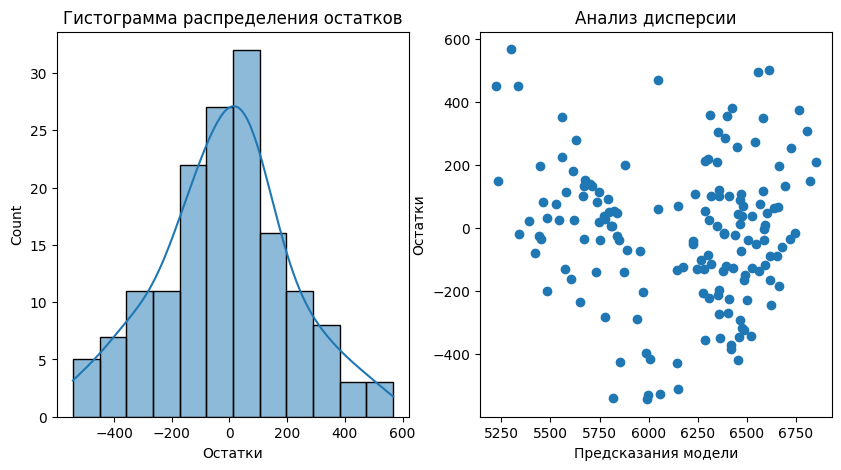

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.histplot(residuals1, bins=12, ax=axes[0], kde=True)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions1, y=residuals1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [43]:
print('Значение R2:', r2_first)

Значение R2: 0.7523027779748498


**Вывод:**

1. В целом, показатель R2 неплохой, однако гистограмма показывает смещение влево - это говорит о том, что прогнозы модели больше истинных значений.
2. Дисперсия остатков, судя по графику - близка к нормальной, т.е. модель равномерно ошибается, хотя есть выбросы.

### Вторая модель

In [44]:
df_main['спо_кластер'] = (
df_main['сахаро_протеиновое_соотношение'].apply(lambda x: 'первый кластер' if x < 0.91 else 'второй кластер')
)

In [45]:
df_main['эке_в_квадрате'] = df_main['энергетическая_кормовая_единица'].apply(lambda x: x ** 2)

In [46]:
y_test_2, model_lr_2, predictions2, r2_second, residuals2, scaler2, encoder2 = linear_model(
             ['удой_кг', 'id', 'жирность', 'белок', 'энергетическая_кормовая_единица', 'сахаро_протеиновое_соотношение', 'возраст'],
             'удой_кг',
             ['порода', 'порода_папы_быка', 'тип_пастбища', 'спо_кластер'],
             ['эке_в_квадрате', 'сырой_протеин_г']
            )

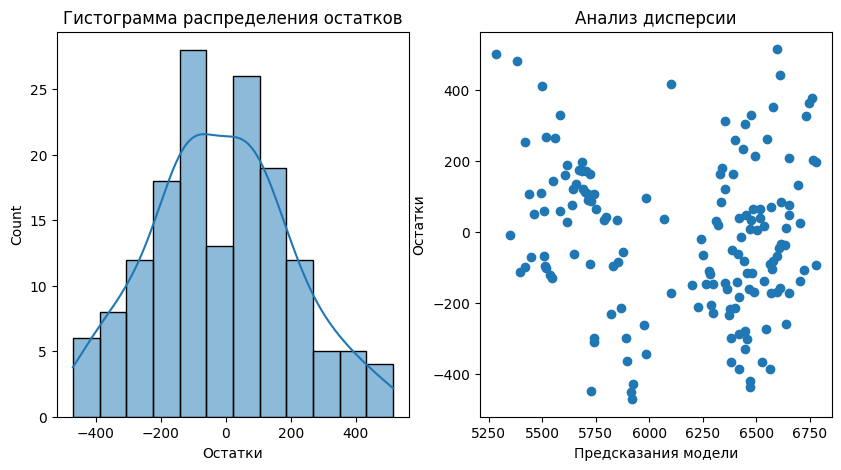

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.histplot(residuals2, bins=12, ax=axes[0], kde=True)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions2, y=residuals2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [48]:
print('Значение R2:', r2_second)

Значение R2: 0.7769729257279729


**Вывод**:

Как видим, метрика R2 улучшилась, среднее значение остатков модели сместилось ближе к нулю, большинство точек сместились влево. Модель стала точнее.

### Третья модель

In [49]:
df_main = df_main.merge(df_dad, on='id', how='left')

In [50]:
df_main.head()

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_кластер,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,первый кластер,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,первый кластер,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,первый кластер,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,первый кластер,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,первый кластер,163.84,Барин


In [51]:
y_test_3, model_lr_3, predictions3, r2_third, residuals3, scaler3, encoder3 = linear_model(
             ['удой_кг', 'id', 'жирность', 'белок', 'эке_в_квадрате', 'сахаро_протеиновое_соотношение'],
             'удой_кг',
             ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'спо_кластер', 'возраст'],
             ['энергетическая_кормовая_единица', 'сырой_протеин_г']
            )

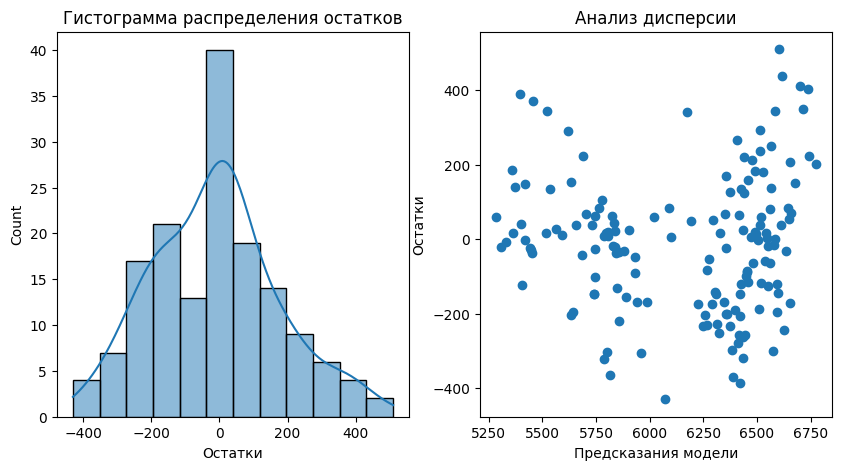

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.histplot(residuals3, bins=12, ax=axes[0], kde=True)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions3, y=residuals3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [53]:
print('Значение R2:', r2_third)

Значение R2: 0.8367407212903307


**Вывод:**

В итоге, с небольшим отрывом побеждает третья модель - она показала R2 = 0.8060906777365907. Среднее значение еще больше приблизилось к нулю, дисперсия осталось такой же. Эту модель можно выбрать как лучшую.

### Сравнение моделей

Сравнение MSE, RMSE, MAE и R2:

In [54]:
def metrics(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mae = mean_absolute_error(y_test, predictions)
    return mse, rmse, mae

In [55]:
mse1, rmse1, mae1 = metrics(y_test_1, predictions1)

mse2, rmse2, mae2 = metrics(y_test_2, predictions2)

mse3, rmse3, mae3 = metrics(y_test_3, predictions3)

In [56]:
metrics = pd.DataFrame({'model': ['1', '2', '3'],
                        'MSE': [mse1, mse2, mse3],
                        'RMSE': [rmse1, rmse2, rmse3],
                        'MAE': [mae1, mae2, mae3],
                        'R2': [r2_first, r2_second, r2_third]})
metrics.T

,0,1,2
model,1,2,3
MSE,51731.312237,46578.977036,34096.533879
RMSE,227.445185,215.821632,184.652468
MAE,175.826153,175.219196,143.558323
R2,0.752303,0.776973,0.836741


Как видим по результатам, наименьшую ошибку допускает третья модель во всех метриках. Она является наиболее точной из трех.

### Получение прогноза

Добавим в датафрейм `df_cow_buy` средние значения некоторых характеристик, увеличенные на 5 %

In [57]:
df_cow_buy['энергетическая_кормовая_единица'] = (
    df_main['энергетическая_кормовая_единица'].mean() * 1.05
)

In [58]:
df_cow_buy['сырой_протеин_г'] = (
    df_main['сырой_протеин_г'].mean() * 1.05
)

In [59]:
df_cow_buy['сахаро_протеиновое_соотношение'] = (
    df_main['сахаро_протеиновое_соотношение'].mean() * 1.05
)

In [60]:
df_cow_buy['спо_кластер'] = (
df_cow_buy['сахаро_протеиновое_соотношение'].apply(lambda x: 'первый кластер' if x < 0.91 else 'второй кластер')
)

In [61]:
df_cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,спо_кластер
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.292862,2021.280386,0.959222,второй кластер
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.292862,2021.280386,0.959222,второй кластер
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.292862,2021.280386,0.959222,второй кластер
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.292862,2021.280386,0.959222,второй кластер
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.292862,2021.280386,0.959222,второй кластер


In [62]:
cow_buy_linear_model = df_cow_buy.drop(['жирность', 'белок', 'сахаро_протеиновое_соотношение'], axis=1)

In [63]:
cow_buy_linear_model.head(5)

,порода,тип_пастбища,порода_папы_быка,имя_папы,возраст,энергетическая_кормовая_единица,сырой_протеин_г,спо_кластер
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,15.292862,2021.280386,второй кластер
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,менее_2_лет,15.292862,2021.280386,второй кластер
2,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,15.292862,2021.280386,второй кластер
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,более_2_лет,15.292862,2021.280386,второй кластер
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,более_2_лет,15.292862,2021.280386,второй кластер


In [64]:
cat_col_names = ['порода',
                 'тип_пастбища',
                 'порода_папы_быка',
                 'имя_папы',
                 'спо_кластер',
                 'возраст']

num_col_names = ['энергетическая_кормовая_единица',
                 'сырой_протеин_г']

Проводим те же операции, что и с моделями, но без разбиения на тренировочную и тестовую части, а также без обучения.

In [65]:
cow_buy_linear_model_ohe = encoder3.transform(cow_buy_linear_model[cat_col_names])

encoder_col_names = encoder3.get_feature_names_out()

cow_buy_linear_model_scaled = scaler3.transform(cow_buy_linear_model[num_col_names])

cow_buy_linear_model_ohe = pd.DataFrame(cow_buy_linear_model_ohe, columns=encoder_col_names)

cow_buy_linear_model_scaled = pd.DataFrame(cow_buy_linear_model_scaled, columns=num_col_names)

cow_buy_linear_model = pd.concat([cow_buy_linear_model_ohe, cow_buy_linear_model_scaled], axis=1)

Получаем результат:

In [66]:
milk_yield = model_lr_3.predict(cow_buy_linear_model)

## Обучение модели логистической регрессии

Снова посмотрим на матрицу корреляций:

interval columns not set, guessing: ['id', 'удой_кг', 'энергетическая_кормовая_единица', 'сырой_протеин_г', 'сахаро_протеиновое_соотношение', 'жирность', 'белок', 'эке_в_квадрате']


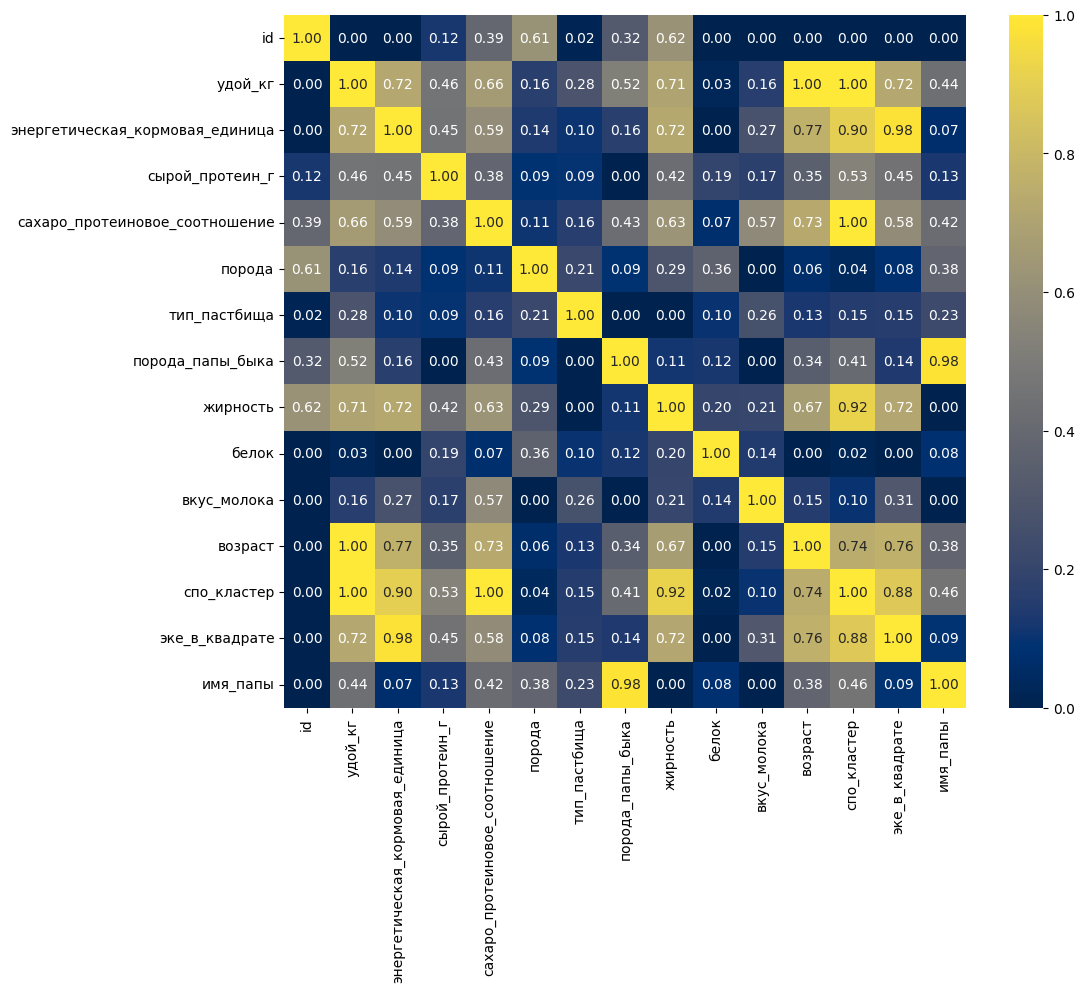

In [67]:
plt.figure(figsize=(11, 9))
sns.heatmap(df_main.phik_matrix(), annot=True, cmap='cividis', fmt='.2f');

Заменим целевую переменную на 0 и 1

In [68]:
df_main['вкус'] = df_main['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)

Теперь создадим функцию для **логистической** модели:

In [69]:
def logistic_model(X, y, cat_col, num_col):
    RANDOM_STATE = 42

    X = df_main.drop(X, axis=1)
    y = df_main[y]

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        random_state=RANDOM_STATE)

    cat_col_names = cat_col

    num_col_names = num_col

    # Кодируем данные
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    # Получаем новые названия столбцов
    encoder_col_names = encoder.get_feature_names_out()
    # Масштабируем
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    # Объединяем в один датафрейм
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    # Инициализируем модель линейной регрессии и обучаем ее
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    # Наш прогноз
    y_pred = clf.predict(X_test)


    return y_test, clf, y_pred, scaler, encoder, X_train, X_test

In [70]:
y_test, clf, y_pred, scaler, encoder, X_train, X_test = logistic_model(
        ['вкус',
        'вкус_молока',
        'id',
        'эке_в_квадрате',
        'спо_кластер'],
        'вкус',
        ['порода', 'тип_пастбища', 'возраст', 'имя_папы', 'порода_папы_быка'],
        ['энергетическая_кормовая_единица', 'сырой_протеин_г', 'жирность', 'белок', 'сахаро_протеиновое_соотношение']
            )

In [71]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<35}: {weight:+.6f}")

порода_РефлешнСоверинг             : -0.168121
тип_пастбища_холмистое             : +0.458164
возраст_менее_2_лет                : +0.165721
имя_папы_Буйный                    : -0.440276
имя_папы_Геркулес                  : -0.594826
имя_папы_Соловчик                  : -0.580017
порода_папы_быка_Соверин           : -0.155449
энергетическая_кормовая_единица    : +0.291628
сырой_протеин_г                    : +0.121643
жирность                           : -0.018255
белок                              : +0.179445
сахаро_протеиновое_соотношение     : +0.289541


Наибольшие веса имеют признаки `тип_пастбища` и `эке_в_квадрате`

In [72]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('accuracy =', acc)
print('recall =', recall)
print('precision =', precision)

accuracy = 0.6217948717948718
recall = 0.7878787878787878
precision = 0.6724137931034483


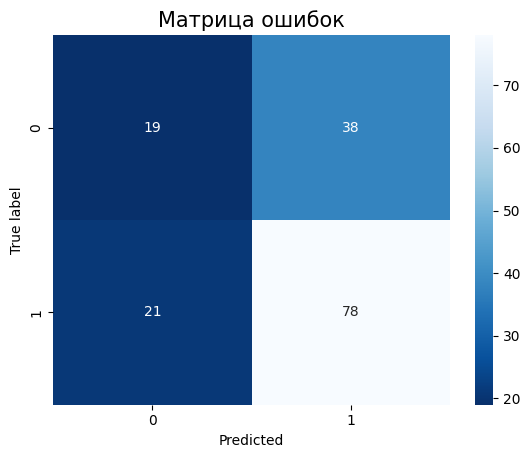

In [73]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Матрица ошибок', fontsize=15)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Для нас критична ошибка первого рода, так как люди, покупая вкусное молоко, не должны "натыкаться" на не вкусное. Нам нужно довести метрику `precision` ближе к единице

In [74]:
y_proba = clf.predict_proba(X_test)[:,1]

In [75]:
data = pd.DataFrame(zip(y_test, y_proba),
columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

In [76]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 5,endpoint=False)]

In [77]:
for i in thresholds:
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 0 if x < i else 1)

print(data.sample(5))

     y_valid   y_proba  y_pred_0.1  y_pred_0.28  y_pred_0.46  y_pred_0.64  \
82         0  0.587953           1            1            1            0   
7          1  0.521578           1            1            1            0   
38         0  0.515587           1            1            1            0   
120        1  0.322986           1            1            0            0   
69         1  0.705873           1            1            1            1   

     y_pred_0.82  
82             0  
7              0  
38             0  
120            0  
69             0  


In [78]:
y_pred = (clf.predict_proba(X_test)[:,1] >= 0.71).astype(int)

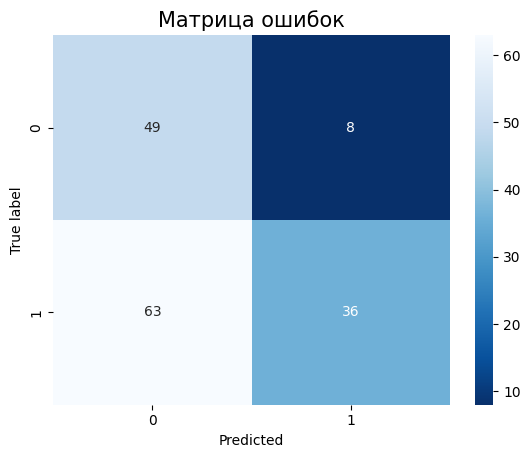

In [79]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Матрица ошибок', fontsize=15)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

В принципе, такие показатели матрицы ошибок нас устраивают

In [80]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print('accuracy =', acc)
print('recall =', recall)
print('precision =', precision)

accuracy = 0.5448717948717948
recall = 0.36363636363636365
precision = 0.8181818181818182


In [81]:
cow_buy_logistic_model = df_cow_buy

In [82]:
cow_buy_logistic_model.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,спо_кластер
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.292862,2021.280386,0.959222,второй кластер
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.292862,2021.280386,0.959222,второй кластер
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.292862,2021.280386,0.959222,второй кластер
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.292862,2021.280386,0.959222,второй кластер
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.292862,2021.280386,0.959222,второй кластер


In [83]:
cat_columns = ['порода',
               'тип_пастбища',
               'возраст',
               'имя_папы',
               'порода_папы_быка']

num_columns = ['энергетическая_кормовая_единица',
               'сырой_протеин_г',
               'жирность',
               'белок',
               'сахаро_протеиновое_соотношение']

In [84]:
#
cow_buy_logistic_model_ohe = encoder.transform(cow_buy_logistic_model[cat_columns])

encoder_columns = encoder.get_feature_names_out()

cow_buy_logistic_model_scaled = scaler.transform(cow_buy_logistic_model[num_columns])

cow_buy_logistic_model_ohe = pd.DataFrame(cow_buy_logistic_model_ohe, columns=encoder_columns)

cow_buy_logistic_model_scaled = pd.DataFrame(cow_buy_logistic_model_scaled, columns=num_columns)

cow_buy_logistic_model = pd.concat([cow_buy_logistic_model_ohe, cow_buy_logistic_model_scaled], axis=1)

In [85]:
milk_taste = (clf.predict_proba(cow_buy_logistic_model)[:,1] >= 0.71).astype(int)

## Итоговые выводы

Добавим прогнозы в датафрейм `df_cow_buy`.

In [86]:
df_cow_buy['прогноз_удой'] = milk_yield

In [87]:
df_cow_buy['прогноз_вкус_молока'] = milk_taste

In [88]:
df_cow_buy['прогноз_вкус_молока'] = df_cow_buy['прогноз_вкус_молока'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')

In [89]:
df_cow_buy.query('прогноз_удой > 6000 and прогноз_вкус_молока == "вкусно"')

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,спо_кластер,прогноз_удой,прогноз_вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.292862,2021.280386,0.959222,второй кластер,6574.487774,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.292862,2021.280386,0.959222,второй кластер,6334.080849,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.292862,2021.280386,0.959222,второй кластер,6574.487774,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.292862,2021.280386,0.959222,второй кластер,6399.257933,вкусно
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.292862,2021.280386,0.959222,второй кластер,6117.155077,вкусно
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.292862,2021.280386,0.959222,второй кластер,6344.129607,вкусно


Судя по данным, с минимальным риском для себя фермер может купить 6 предоставленных коров, так как их характеристики соответствуют поставленной задаче, т.е. удой больше 6000 кг в год и молоко вкусное.

Что касается рекомендаций фермеру:
1. Новые добавки в корм коров, например, витамины, углеводы и т.д.
2. Контроль здоровья. Прививки, своевременное лечение. Раннее выявление и лечение болезней может предотвратить снижение удоя и качества молока.
3. Приобретать коров только с хорошей генетикой, способных обеспечивать высокий удой и качественное молоко. Учитывать породу матери коровы.

Для улучшения качества регрессионной модели мы добавили новый признак `имя_папы_быка` из другого датасета, удалили некоторые выбросы, что увеличило метрику на несколько процентов, один из количественных признаков перевели в категориальный.

Улучшить результаты модели можно за счет добавления новых признаков, удаления выбросов и т.д. Также стоит отметить, что данных в датасетах было мало, около 600 строк. Стоило бы проследить за сбором информации.

Для анализа рисков в логистической модели используются accuracy (метрика общей точности модели), ее дополняют матрица ошибок, precision (для минимизации ложных положительных прогнозов) и recall (для минимизации ложных отрицательных прогнозов)